<a href="https://colab.research.google.com/github/danielleitesoares/Work_Sentimental_Analyzer_Of_Restaurant_Issue/blob/main/Analise_dos_Sentimentos_Restaurantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazon</center>
###  <center>Escola Superior de Tecnologia</center>
#####  <center>P√≥s-gradua√ß√£o Lato Sensu em Ci√™ncia de Dados</center>
#####  <center>Programa√ß√£o para Ci√™ncia de Dados (Turma 02)</center>
---
## <center>Trabalho de An√°lise de Sentimetos</center>
##### <center>Professor: <a href="http://tiagodemelo.info/" target="_blank">Dr. Tiago de Melo</a></center>
###### <center>Equipe: Daniel Soares, Leonardo Rocha, Paulo Corr√™a</center>



##### Se√ß√µes Trabalho
* [1. Contextualiza√ß√£o do Trabalho](#sec1)

* [2. Importa√ß√£o das Bibliotecas](#sec2)
  
* [3. Abertura e Tratamento do DataSet e cria√ß√£o do DataFrame](#sec3)
  
* [4. Informa√ß√µes e Estat√≠sticas do DataFrame](#sec4)
  
* [5. Gr√°ficos de relacionamentos do DataFrame](#sec5)

* [6. Outras maneira de exibir estat√≠sticas e informa√ß√µes sobre o DF](#sec5)

* [7. An√°lise de Sentimentos](#sec6)



### **1.Contextualiza√ß√£o do Trabalho**

Trabalho para aprendizagem de t√©cnicas e m√©todos de an√°lise de sentimentos usando programa√ß√£o em Python e demais bibliotecas.



### **2.Importa√ß√£o das Bibliotecas**




In [1]:
#Bibliotecas B√°sicas
!pip install sweetviz -q
!pip install -U pandas-profiling
!pip install --user -q datascience
!pip install --user -q pandas-profiling 

import pandas as pd
import numpy as np
import json
import nltk
nltk.download('punkt')
from textblob import TextBlob
import time  # avaliar
import sys
import unicodedata
import requests

#Bibliotecas de Gr√°ficos e Relat√≥rios 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as ppf
from pandas_profiling import ProfileReport
import sweetviz as sv
from IPython.display import Image
from bs4 import BeautifulSoup
import re
import random as rd 
#Bibliotecas de An√°lise de Sentimentos
import textblob


     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15.1MB 310kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71kB 7.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 266kB 5.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71kB 7.8MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1MB 17.1MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 604kB 39.8MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 296kB 41.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=fc395dd45a997ada5166568f70d60962c4a46665190713db8c71faecbf45424f
  Stored in

### **3. Abertura e Tratamento do DataSet e cria√ß√£o do DataFrame**


##### 3.1. Abrindo o reposit√≥rio do DataSet




In [2]:
! git clone https://github.com/paulordie/sentimental_ds
%cd sentimental_ds/

Cloning into 'sentimental_ds'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 109 (delta 5), reused 13 (delta 4), pack-reused 95
Receiving objects: 100% (109/109), 90.58 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (14/14), done.
/content/sentimental_ds


##### 3.2.Abertura e Tratamento do DataSet e cria√ß√£o do DataFrame



In [65]:
dados = open('dataset-v2.dat')
a = dados.readlines()# Criar uma lista com todos as linhas em strings 
v = [] # vetor para salvar cada linha em json  
#Comando for para correr por cada item de "a" que est√° as linhas 
for c in a:
  parsed_c = json.loads(c) #Traransformar as strings de "a" em arquivos json
  data = pd.json_normalize(parsed_c) #Normalizando o arquivo json 
  v.append(data)#jogamos os arquivos em 'V', 
  #aqui vamos concatenar cada linha que est√° em 'V' para um unico dataset df 
df = pd.concat(objs=v,axis=0) # Concatenando 

##### 3.3 Salvando em outros formatos

In [ ]:
#Montando o local no google drive pra salvar
#import pandas as pd
#from google.colab import drive
#drive.mount("/content/drive")
#Converterndo e Salvando em CSV
#df.to_csv('/content/drive/My Drive/dataset123.csv')#salvando o arquivo em csv  \\\\\\\\\\\\\\\\\\\\\verificar
#Convertendo e salvar em excel 
df.to_excel('/dataset.xlsx')

##### 3.4 Ajustando nome de colunas e exibindo o Head do DataFrame

In [66]:
df = df.rename(columns={'itemReviewed.name':'Name','itemReviewed.address.streetAddress':'StressAddress','itemReviewed.address.addressLocality':'AddressLocality','itemReviewed.address.addressRegion':'AddressRegion','itemReviewed.address.postalCode':'PostalCode','itemReviewed.address.country':'Country','itemReviewed.website':'Website','itemReviewed.email':'Email','itemReviewed.phoneNumber':'PhoneNumber','itemReviewed.averageRating':'AverageRating'})
df = df.reset_index(drop=True)
df.head(10)

title  ... AverageRating
0                               Jantar   ...           4.5
1                  Uma boa experi√™ncia.  ...           4.5
2                    Otimo self service  ...           4.5
3  O sorvete mais tradicional do estado  ...           4.0
4                     Melhor hamburger!  ...           4.5
5                Um achado maravilhoso!  ...           4.5
6                              Saboroso  ...           4.0
7                          Bom trabalho  ...           4.5
8                          Maravilhoso!  ...           4.0
9                Mais tradicional de BH  ...           4.0

[10 rows x 21 columns]

### ***4. Informa√ß√µes e Estat√≠sticas do DataFrame***

##### 4.1 Informa√ß√µes Gerais sobre o DF. Informa√ß√µes de quantidades de registros, n√∫mero de colunas, quais os atributos e seus tipos. Semelhante a utiliza√ß√£o dos comandos   df.types(), df.insa().sum(), df.count(), df.shpe()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            100000 non-null  object
 1   reviewId         100000 non-null  object
 2   restaurantId     99999 non-null   object
 3   author           99999 non-null   object
 4   reviewBody       99999 non-null   object
 5   language         100000 non-null  object
 6   mobileDevice     100000 non-null  object
 7   userLocation     100000 non-null  object
 8   publicationDate  100000 non-null  object
 9   visitDate        100000 non-null  object
 10  ratingValue      100000 non-null  object
 11  Name             100000 non-null  object
 12  StressAddress    100000 non-null  object
 13  AddressLocality  100000 non-null  object
 14  AddressRegion    100000 non-null  object
 15  PostalCode       100000 non-null  object
 16  Country          100000 non-null  object
 17  Website    

##### 4.2 Exibindo linha que est√° com os atributos incompletos

In [68]:
dfcolor = df[df.isnull().any(axis=1)]
dfcolor.head()
dfcolor.style.highlight_null(subset=['restaurantId','author','reviewBody'])

### 5. Gr√°ficos do DataFrame

####5.1  Avali√ß√µes de estabelicimentos por Estados em ordem descrescente.

In [69]:
df_Adressregion = df['AddressRegion'].value_counts().to_frame() # https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts https://re-thought.com/pandas-value_counts/https://re-thought.com/pandas-value_counts/
df_Adressregion.head()

AddressRegion
Estado de S√£o Paulo               17455
Estado do Rio de Janeiro          10583
Rio Grande do Norte                7075
Cear√°                              6206
Bahia                              6030

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

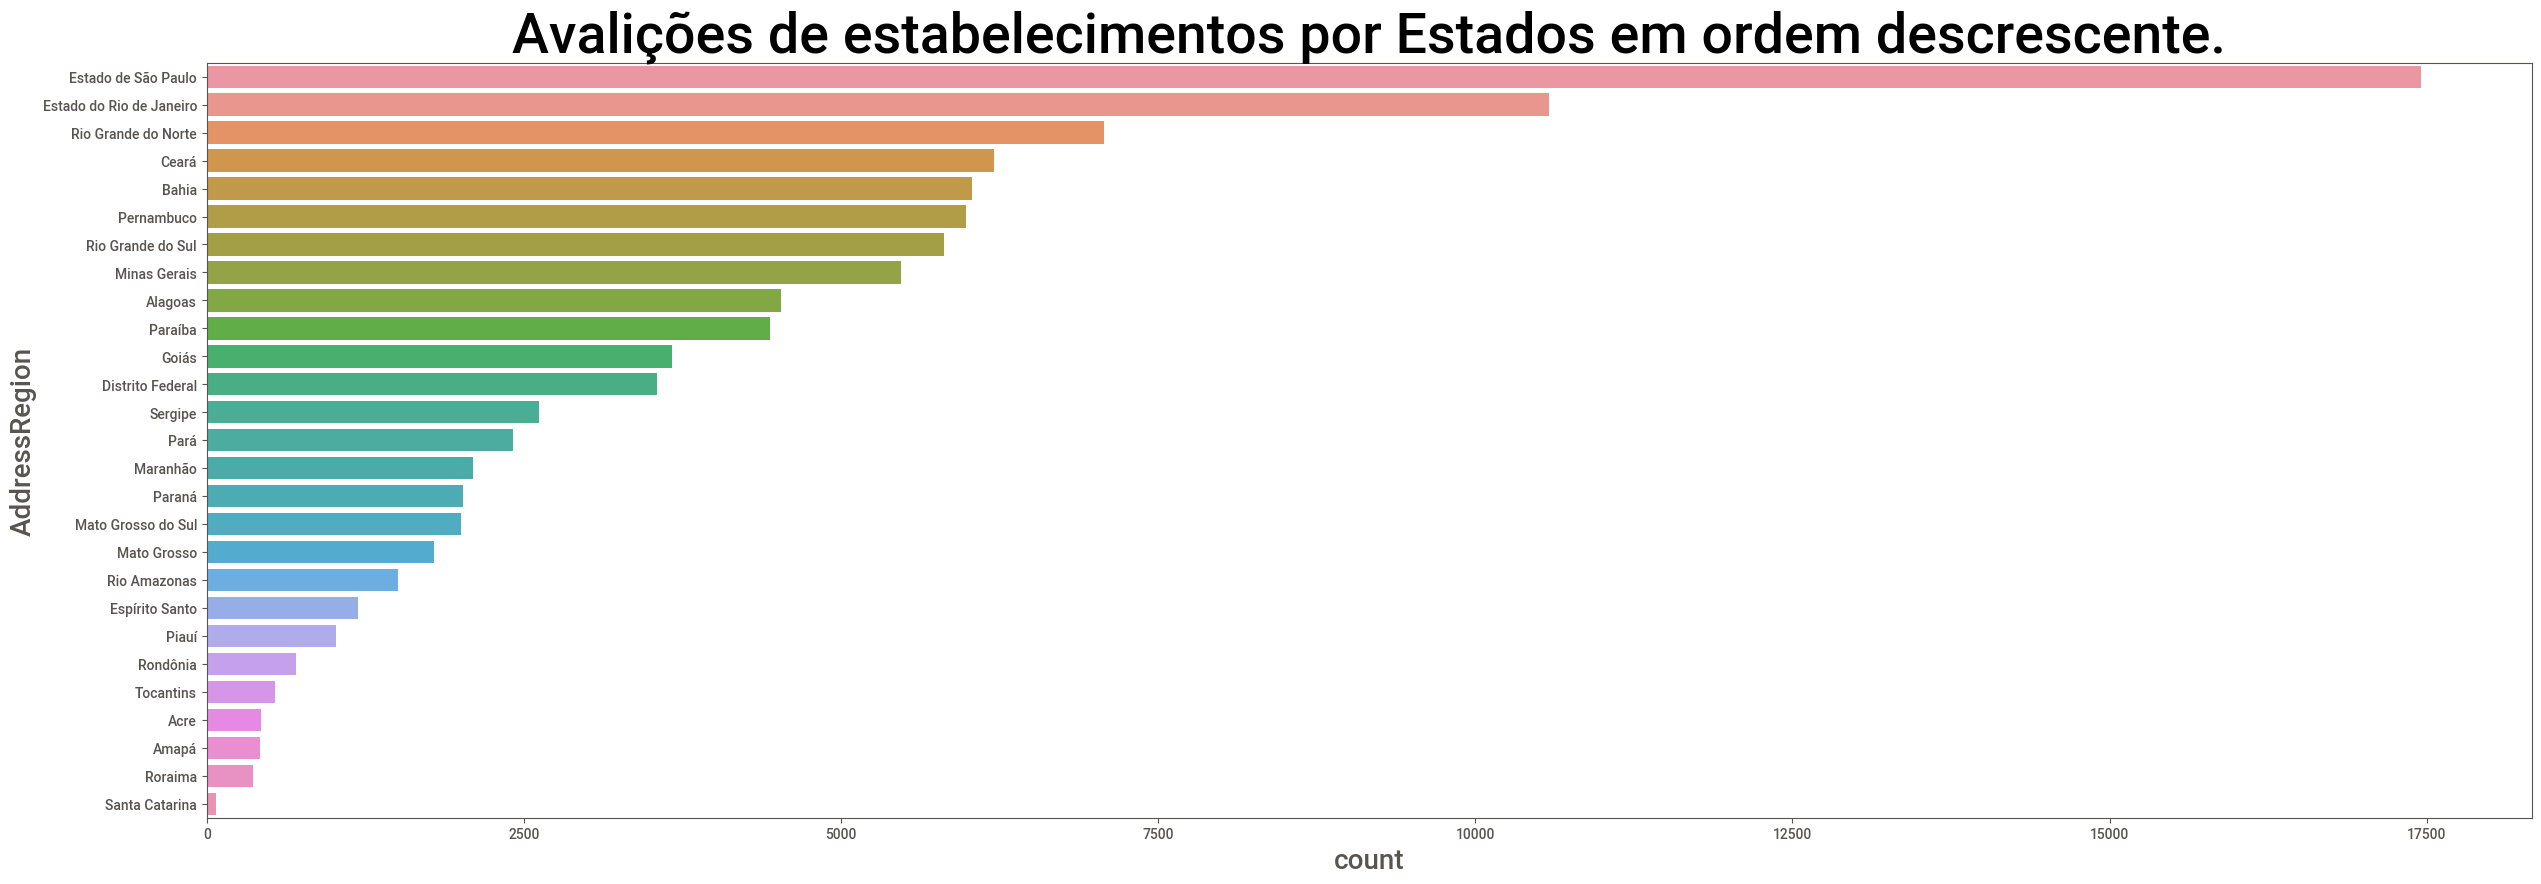

In [70]:
#Gr√°fico de Estados com mais avali√ß√µes em ordem descrescente. 
fig = plt.figure(figsize=(30,10)) 
sns.countplot(y='AddressRegion', order = df['AddressRegion'].value_counts().index, data=df)
plt.title('Avali√ß√µes de estabelecimentos por Estados em ordem descrescente.',fontsize=40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.ylim(0.1,30)

##### 4.1 Salvando em outros formatos

####5.2 Avalia√ß√µes por tipo dispositivos

Text(0.5, 1.0, 'Percentual de avalia√ß√£o por dispositivos')

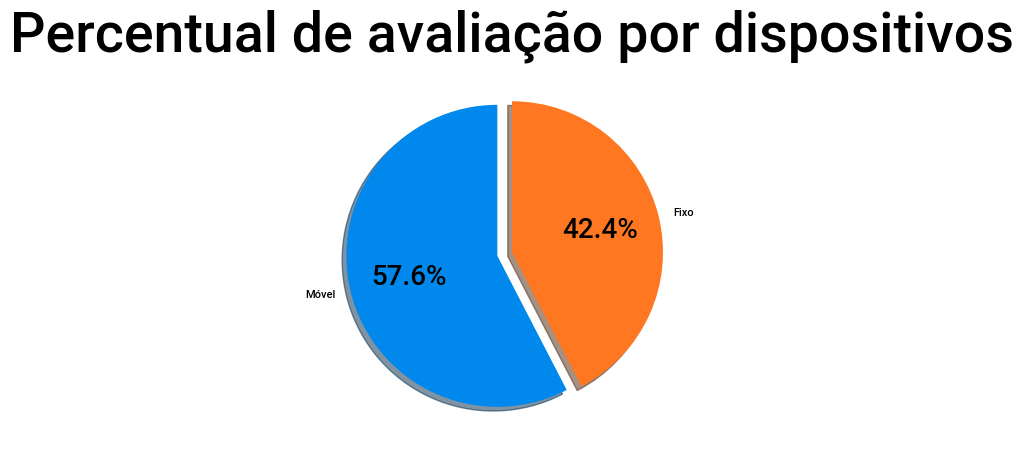

In [71]:
# Percentual de avalia√ß√£o por dispositivos - https://www.youtube.com/watch?v=wYxDyg1UnMw

plt.rcParams.update({'font.size':20})
rotulos = ['M√≥vel', 'Fixo']
dfdisp = df.groupby(by='mobileDevice').size()
explode = (0.1,0)
plt.figure(figsize=(5,5))
plt.pie(x=dfdisp, labels=rotulos,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Percentual de avalia√ß√£o por dispositivos',fontsize=40)
##plt.show()

####5.3 Avali√ß√µes de Estabelecimentos do Amazonas



In [72]:
df_am = df[df['AddressRegion']=='Rio Amazonas'] 
df_am.head()
df_am2= df_am['Name'].value_counts().to_frame()
df_am2.head(10)

Name
Banzeiro                                           209
Coco Bambu Manaus                                  154
Cacha√ßaria do Ded√© e Emp√≥rio - Manauara Shopping   118
Tambaqui de Banda - Parque 10                       77
La Parrilla                                         74
Caxiri Manaus                                       57
Churrascaria B√∫falo                                 49
Choupana                                            46
Bar Do Armando                                      37
O Lenhador                                          29

In [73]:
df_am2.sum()

Name    1506
dtype: int64

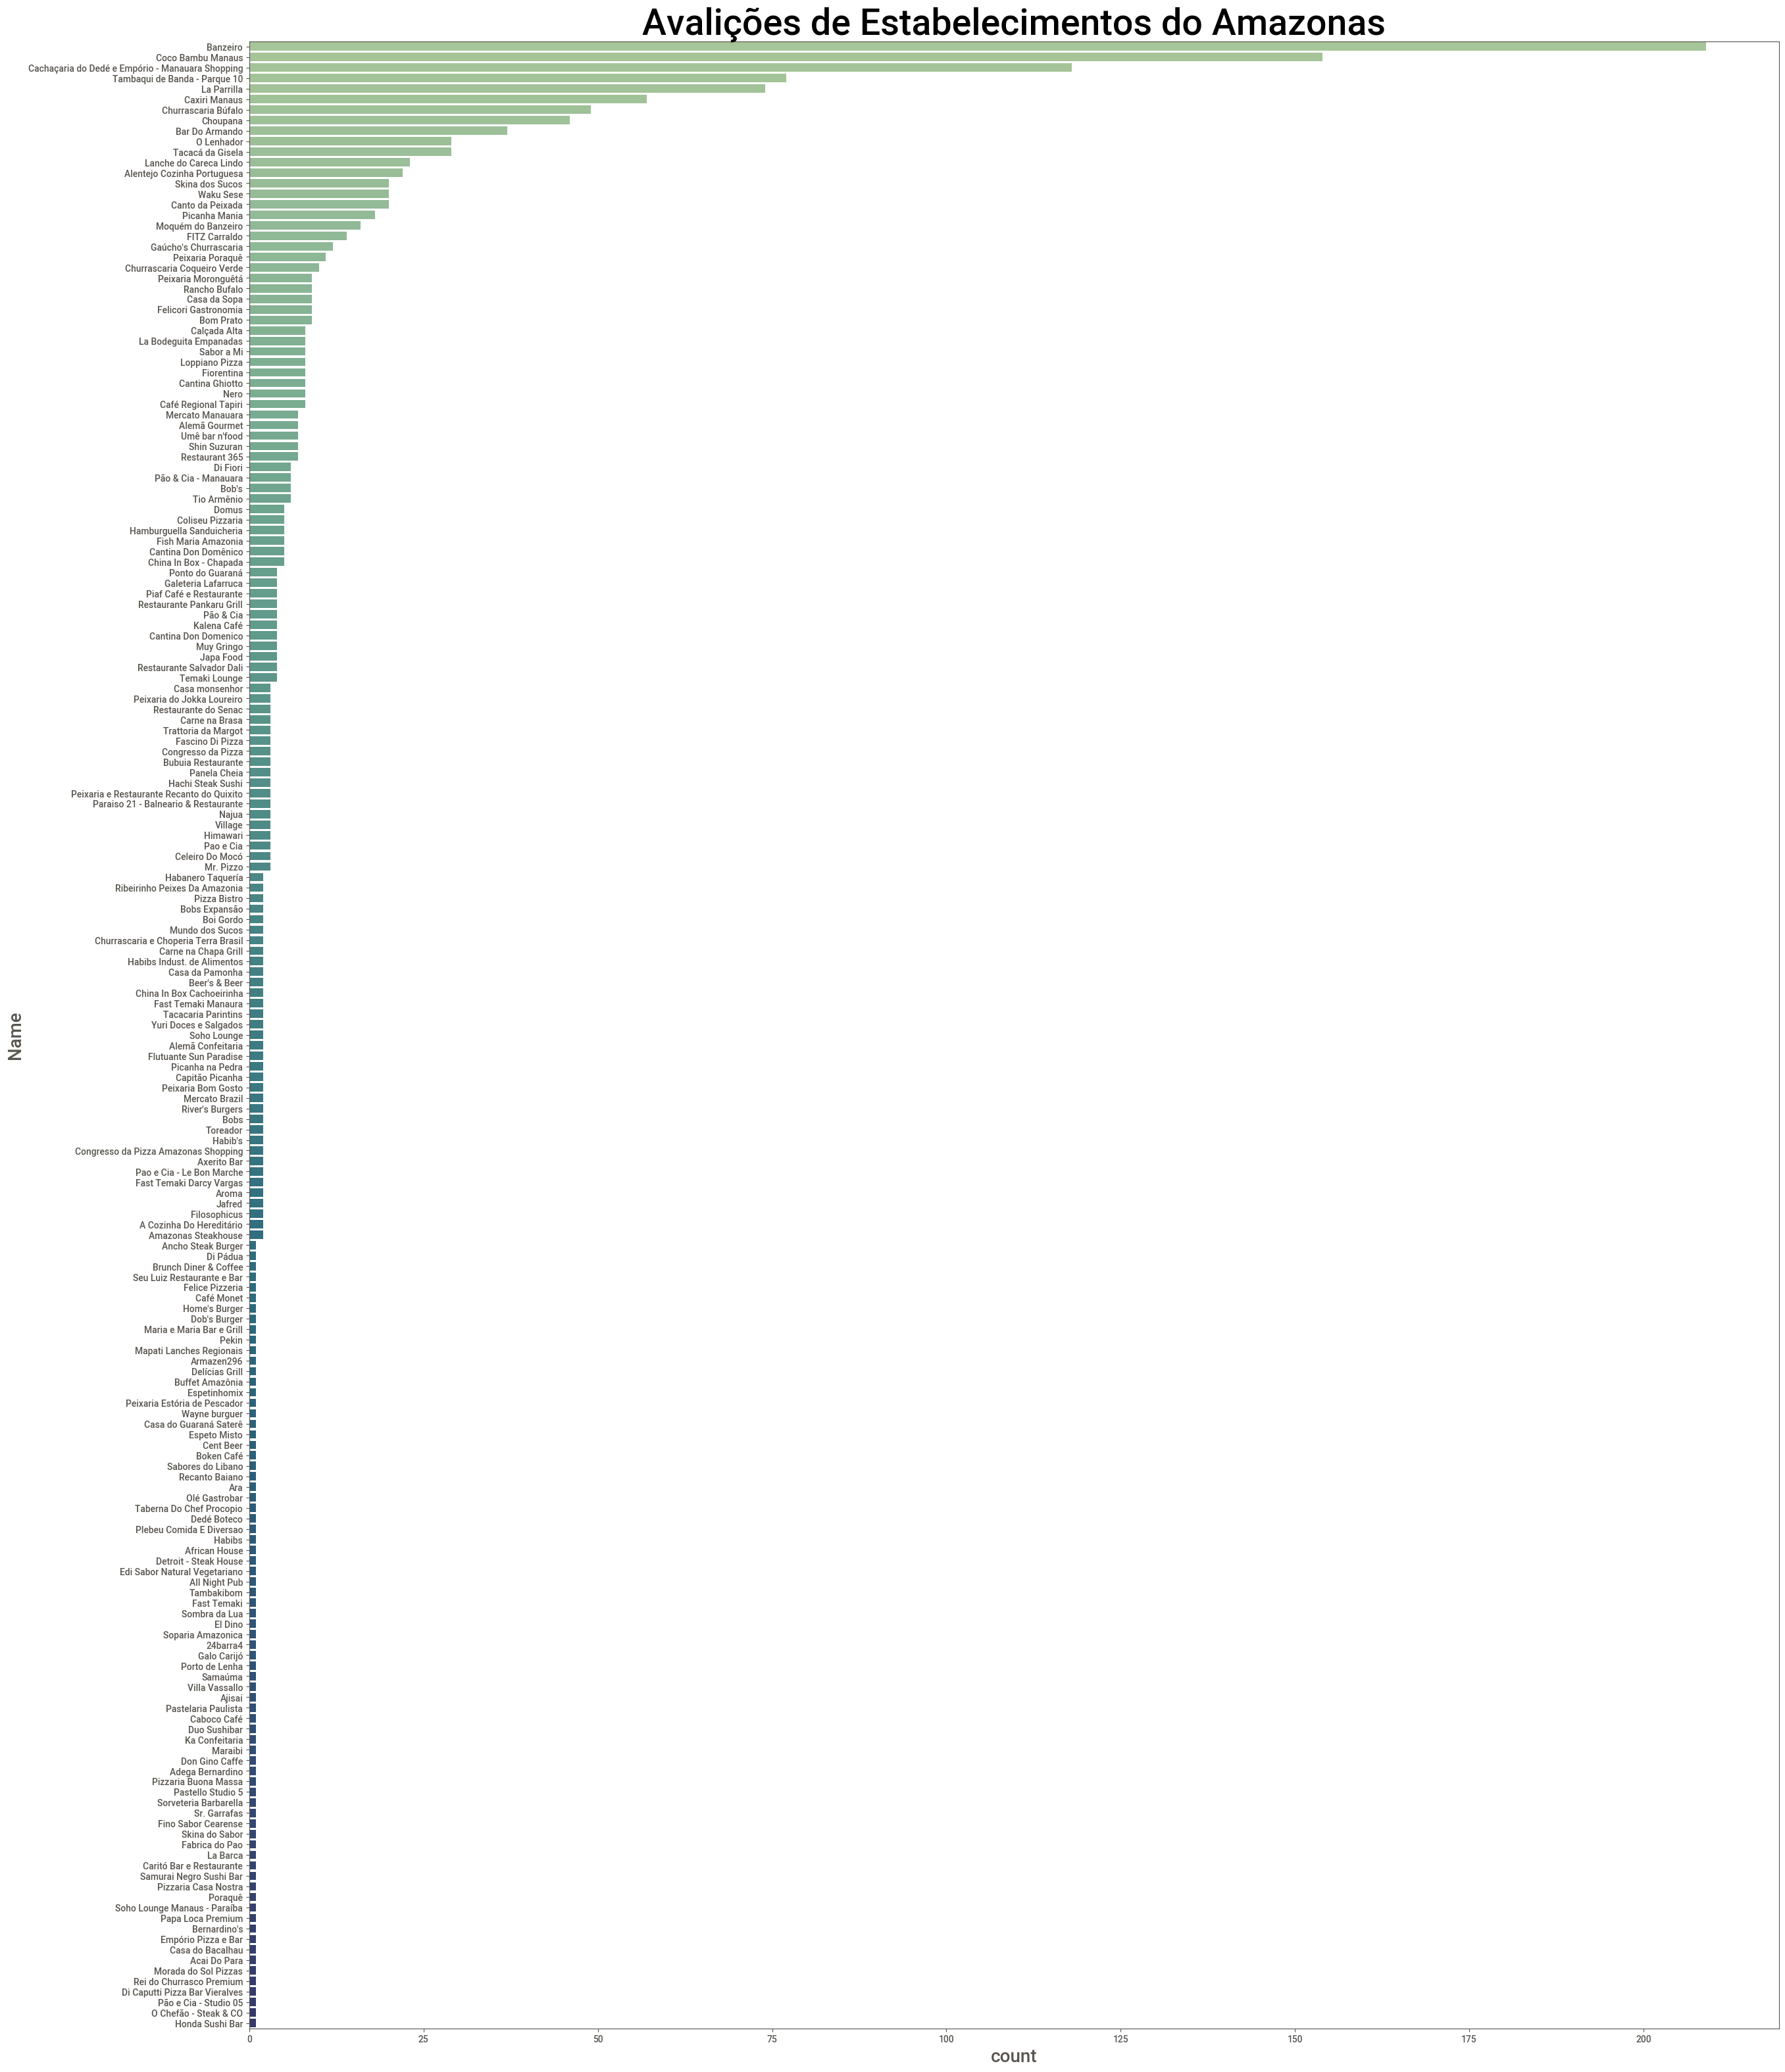

In [74]:
fig = plt.figure(figsize=(30,40))
plt.title('Avali√ß√µes de Estabelecimentos do Amazonas',fontsize=40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.countplot(y='Name', order = df_am['Name'].value_counts().index, data=df_am, palette='crest')

#### 5.4 Avalia√ß√µes por Localiza√ß√£o do Usu√°rios

In [75]:
# Divide o campo User Location com os valores ap√≥s a , para uma nova coluna denominadas de Estado e Cidade, https://pt.linkedin.com/pulse/dividindo-colunas-por-delimitador-com-python-fernanda-santos
divisao = df['userLocation'].str.split(',') 
Cidade = divisao.str.get(0) 
Estado = divisao.str.get(1)
df['Cidade'] = Cidade.str.upper()
df['Estado'] = Estado.str.upper()
df.head()

title   reviewId  ...          Cidade Estado
0                               Jantar   692856288  ...      S√ÉO CARLOS     SP
1                  Uma boa experi√™ncia.  229208487  ...          MANAUS     AM
2                    Otimo self service  679002332  ...         GOI√ÇNIA     GO
3  O sorvete mais tradicional do estado  355671519  ...         ARACAJU     SE
4                     Melhor hamburger!  268741921  ...  RIO DE JANEIRO     RJ

[5 rows x 23 columns]

In [76]:
df.dtypes

title              object
reviewId           object
restaurantId       object
author             object
reviewBody         object
language           object
mobileDevice       object
userLocation       object
publicationDate    object
visitDate          object
ratingValue        object
Name               object
StressAddress      object
AddressLocality    object
AddressRegion      object
PostalCode         object
Country            object
Website            object
Email              object
PhoneNumber        object
AverageRating      object
Cidade             object
Estado             object
dtype: object

In [77]:
df_Estado = df['Estado'].value_counts().to_frame()[:20] # https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts https://re-thought.com/pandas-value_counts/https://re-thought.com/pandas-value_counts/
df_Estado.head(10)

Estado
 SP   20673
 RJ    9780
 MG    6422
 DF    5605
 RS    5398
 BA    4445
 PE    4220
 CE    3539
 PR    3088
 GO    2950

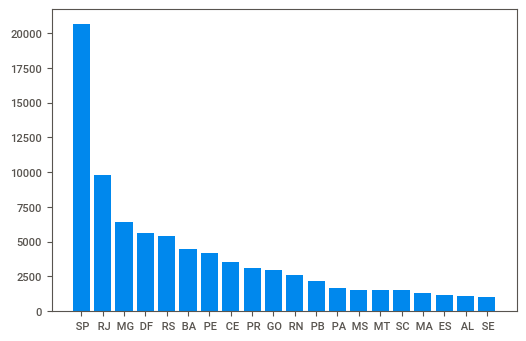

In [63]:
plt.bar(df_Estado.index,df_Estado['Estado'])
plt.show()

#### 5.5 Avalia√ß√µes por ano

In [79]:
#Converter 	a coluna  publicationDate para data
df['publicationDate'] = pd.to_datetime(df['publicationDate'])
df.dtypes

title                      object
reviewId                   object
restaurantId               object
author                     object
reviewBody                 object
language                   object
mobileDevice               object
userLocation               object
publicationDate    datetime64[ns]
visitDate                  object
ratingValue                object
Name                       object
StressAddress              object
AddressLocality            object
AddressRegion              object
PostalCode                 object
Country                    object
Website                    object
Email                      object
PhoneNumber                object
AverageRating              object
Cidade                     object
Estado                     object
dtype: object

In [80]:
ddt= df.groupby(df['publicationDate'].dt.year).size().reset_index().rename(columns={0: 'Total', 'publicationDate':'Date'})
ddt= f = ddt.rename(columns={'publicationDate':'Date'})
ddt.head(20).T

0     1     2     3     4   ...     7      8      9      10    11
Date   2009  2010  2011  2012  2013  ...   2016   2017   2018   2019  2020
Total     2    11   150  1322  5826  ...  22056  14038  12549  11263  2258

[2 rows x 12 columns]

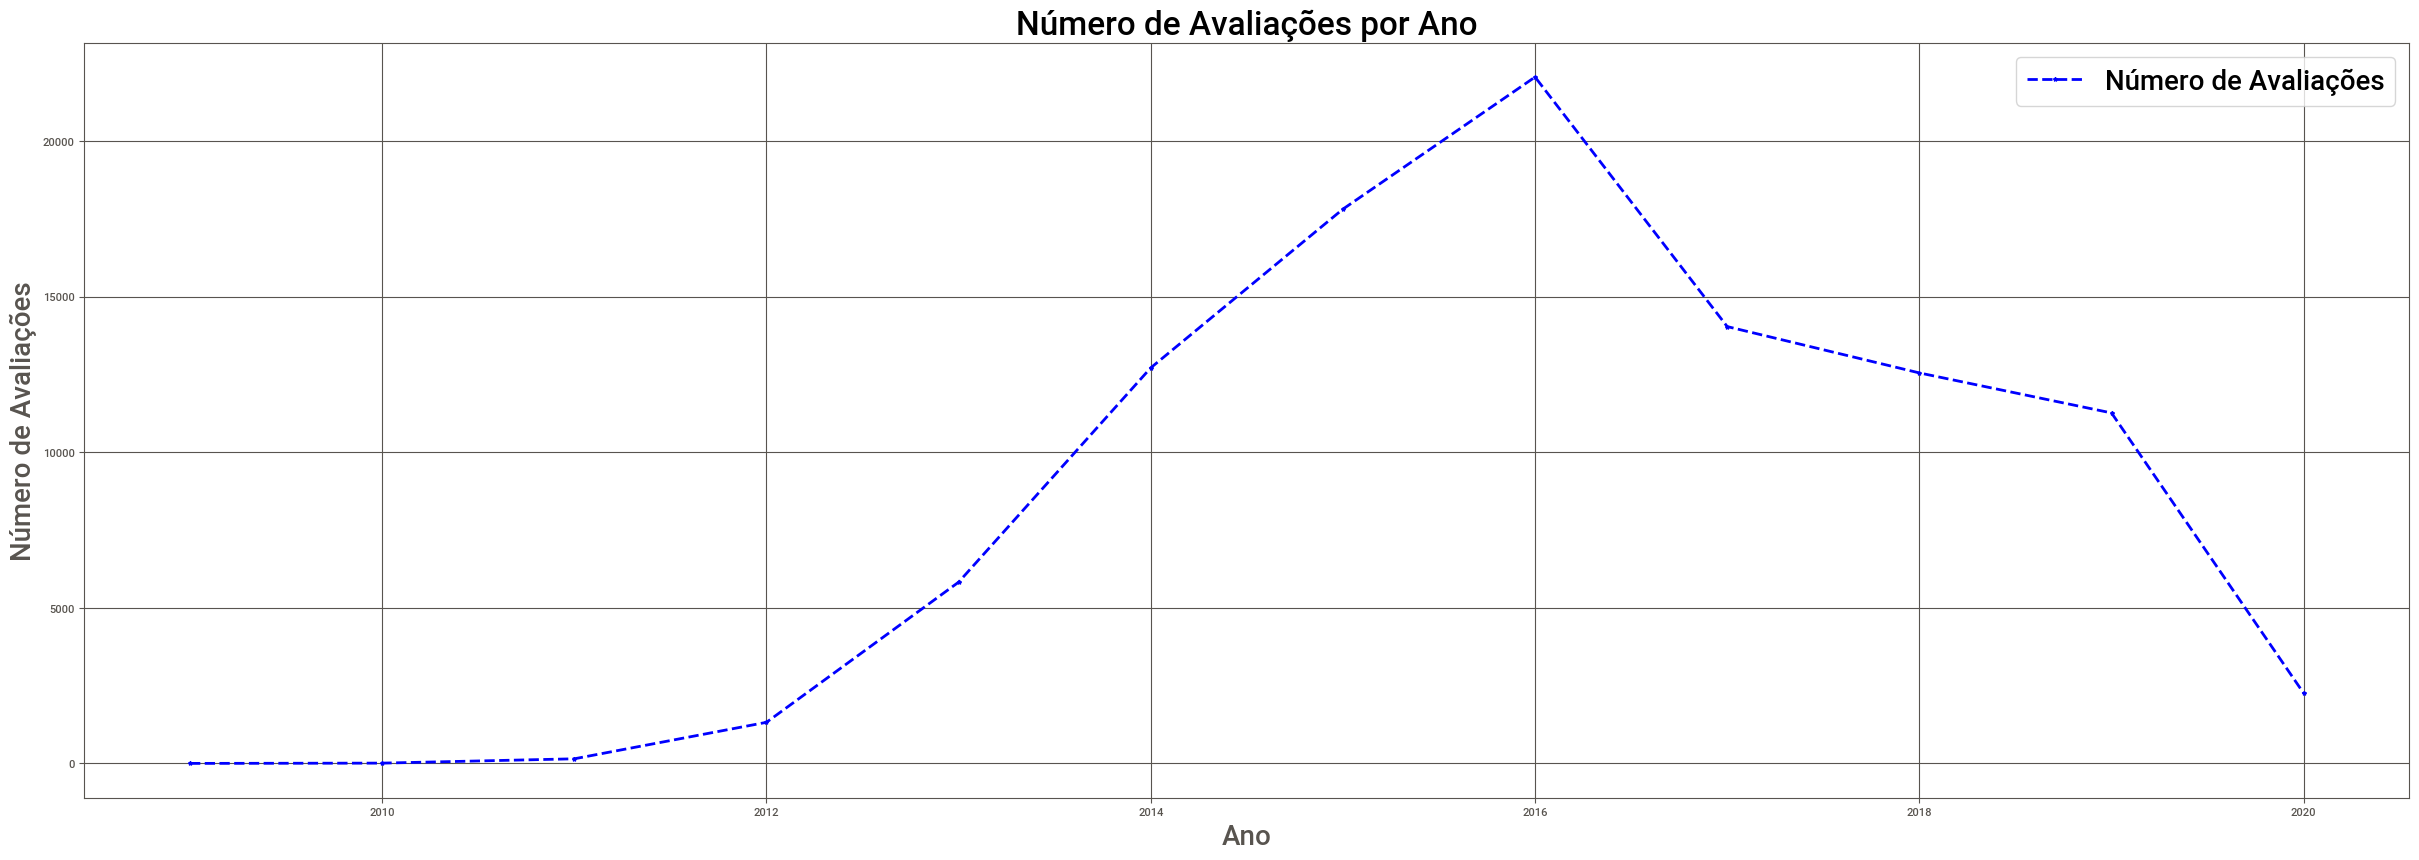

In [81]:
x = ddt['Date']
y = ddt['Total']
plt.figure(figsize=(30,10))#tamanho do grafico
plt.plot(x,y,label='N√∫mero de Avalia√ß√µes',color='blue',linestyle='--',linewidth=2,marker = "*")#plot para grafico de linhas 
#titulo
plt.title('N√∫mero de Avalia√ß√µes por Ano')
#EIXO X
plt.xlabel('Ano')
#EIXO Y 
plt.ylabel('N√∫mero de Avalia√ß√µes')
plt.grid(True)
plt.legend()

#### 5.6 Os 10 restaurantes mais avaliados no Brasil

In [82]:
df['Name'].value_counts().reset_index()[:10]

index  Name
0  Coco Bambu Frutos do Mar  1083
1      Camar√µes Restaurante  1068
2                    Mangai  1023
3         Camar√µes Potiguar   699
4    Imperador dos Camar√µes   661
5          Bodega do Sert√£o   608
6       Coco Bambu Meireles   595
7   Coco Bambu Porto Alegre   431
8         Nau Frutos do Mar   425
9   Coco Bambu - Dom Pastel   421

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

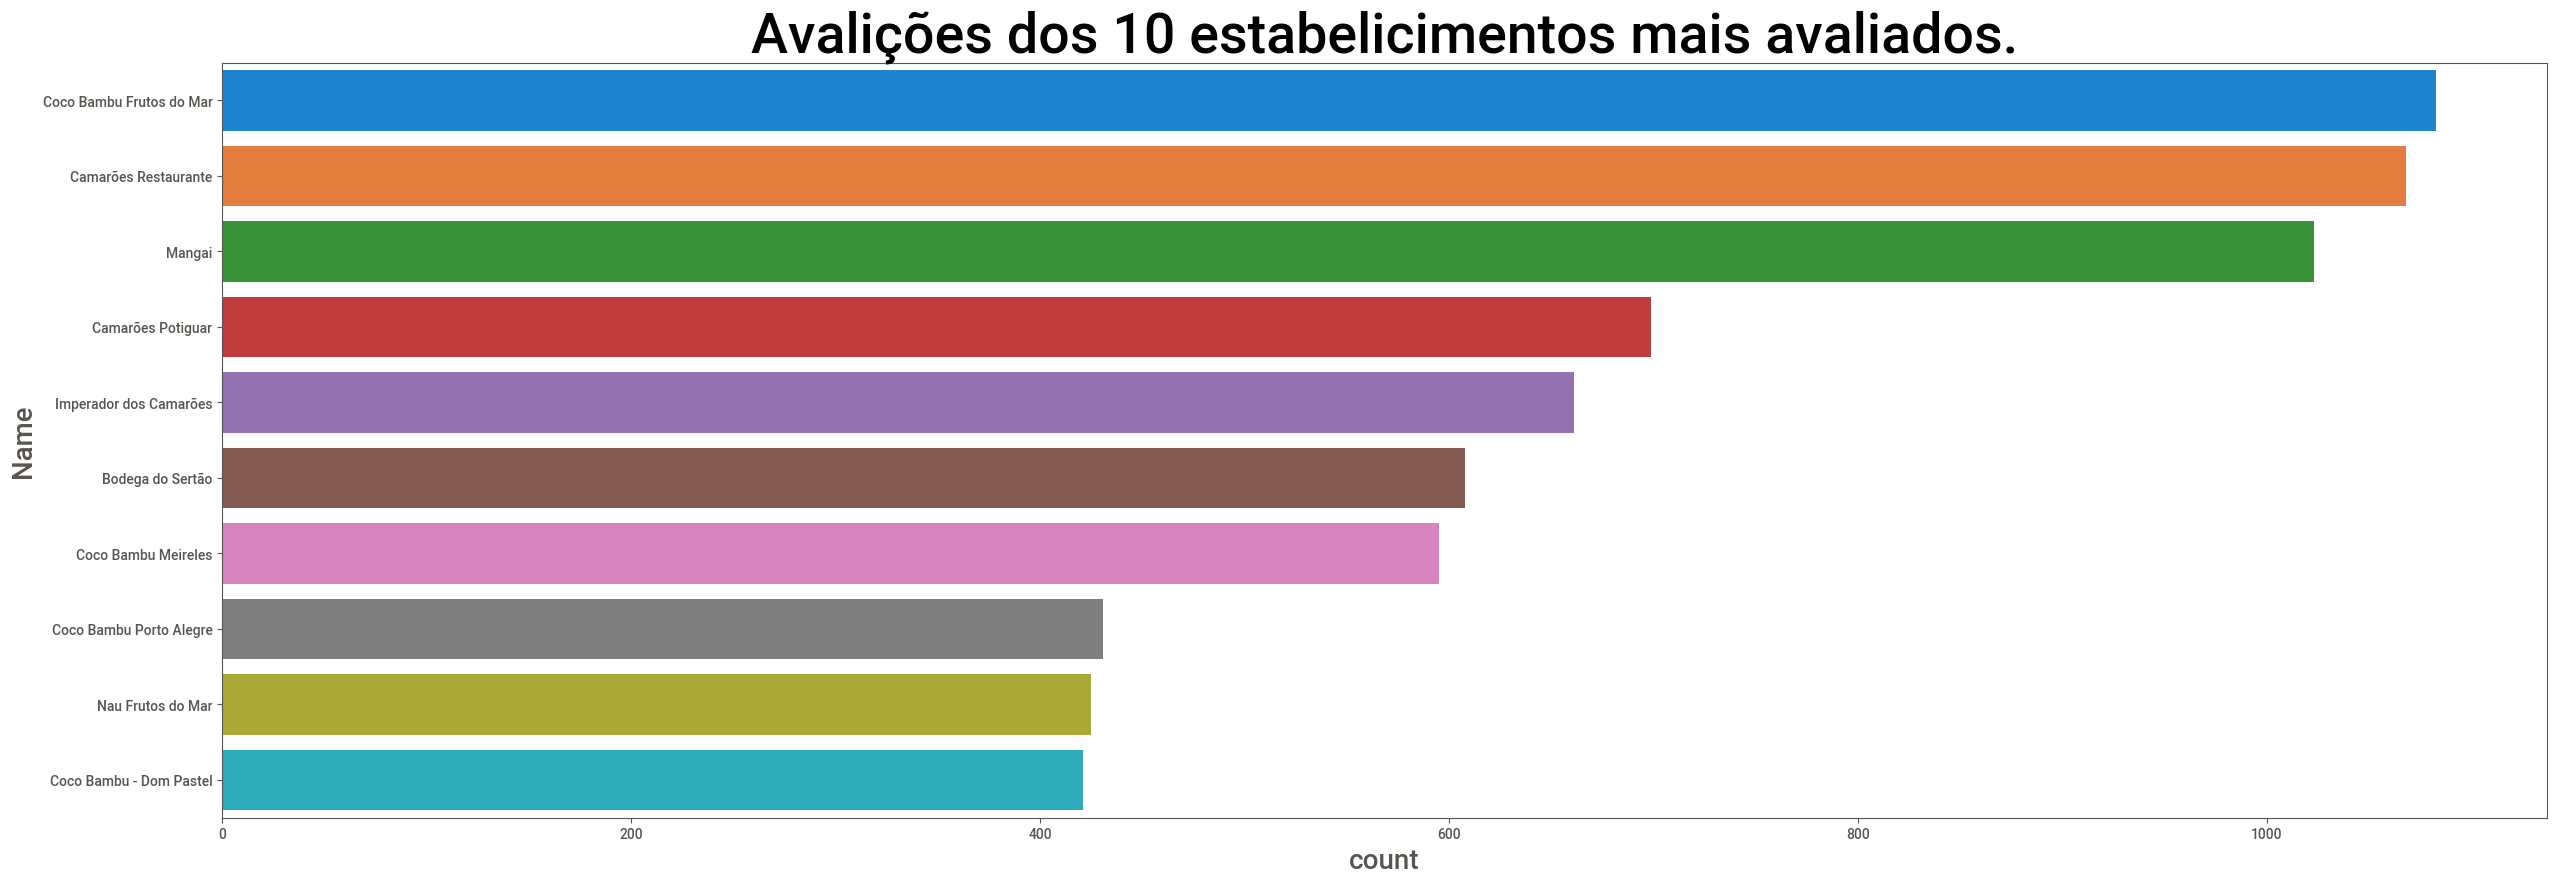

In [83]:
fig = plt.figure(figsize=(30,10)) 
sns.countplot(y='Name', order = df['Name'].value_counts().iloc[:10].index, data=df)
plt.title('Avali√ß√µes dos 10 estabelicimentos mais avaliados.',fontsize=40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


### 6. Outras maneira de exibir estat√≠sticas e informa√ß√µes sobre o DF, usando as bibliotecas SWEETVIZ e PANDAS-PROFILING


####6.1 Montando √°rea para salvar os relat√≥rios

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####6.2 An√°lises, est√≠tiscas e informa√ß√µes gerais sobre o DF

In [33]:
from IPython.display import Image
df_analysis=sv.analyze(df)
df_analysis.show_html('analises_gerais_do_DF.html')



Report analises_gerais_do_DF.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


####6.3 Relat√≥rio de informa√ß√µes gerais

In [45]:
design_report = ProfileReport(df) 
design_report.to_file (output_file = 'profile.html')

In [32]:
import pandas_profiling
import pandas_profiling as ppf
ppf.ProfileReport(df)

####6.5 Avalia√ß√µes por tipo dispositivos

# **PAULO, VOC√ä FAZ OS SEUS COMITES DESSA SE√á√ÉO EM DIANTE, OK?**

### **7. Analise dos Sentimentos** 

##Sele√ß√£o do n√∫mero aleat√≥rio de 200 senten√ßas

In [ ]:
def twoHandSentences():
  import random as rd
  arm = []
  for x in range(0,200):
    rand = rd.randint(0,10000)
    #print(f'{x} rand {rand}')
    arm.append(rand)
  return arm
_Sentences = twoHandSentences()
print(_Sentences[0])
sizeFinal = len(_Sentences)

982


##Carregamento do itens selecionado aleatoriamente da base de dados

In [ ]:
def arrangeSentences(_Sentences):
  armSent = []
  x = 0
  for sent in _Sentences:
    init = json.loads(a[sent])
    dados = pd.json_normalize(init)
    armSent.append(dados)
  return armSent

sentencesWereSaved = arrangeSentences(_Sentences)


In [ ]:
arrange = pd.concat(objs=sentencesWereSaved, axis=0)


In [ ]:
def takeOneSentence():
  toTakeOne = twoHandSentences()
  oneSentence = arrangeSentences(toTakeOne[0])
  return oneSentence

In [ ]:
def clean_tripadvisor(tweet):
    try:
        tweet = BeautifulSoup(tweet, 'lxml').get_text() # o lxml indica o parse pode ser usado para dados de web por ex
        tweet = re.sub(r"\b\s-\s", ' ', tweet)
        # tweet = re.sub(r"\s....", '', tweet)
        tweet = re.sub(r"\b\.\s\\n", '. \n', tweet)
        tweet = re.sub(r"\b\.", '. \n', tweet)    
        return tweet
    except TypeError:
        print("Errou o tipo no regex")

#Avalia√ß√£o se Subjetiva ou factual

In [ ]:
def whichIsSentence(subj,pol):
  if subj == 0.0 and pol == 0.0:
    print("subjetiva")
  elif subj < 1.1 and pol == 1.1:
    print("positivo com alto indice subjetivo") 
  

##M√©todos de avalia√ß√£o: Precis√£o, Renova√ß√£o e Medida-F

In [ ]:
def methodAvailablePrecision(A,B):
  
  pass

In [ ]:
def methodAvailableRenovation(A,B):
  
  pass

In [ ]:
def methodAvailableF1(A,B):
  
  pass

##Avaiable each sentence

In [ ]:
def englishSentence(whichLanguage):
    comentatio_pt = whichLanguage.translate(to='pt')
    comentario_us = comentatio_pt.translate(to='us')
    
    time.sleep(5)

    for sentence_pt, sentence in zip(comentatio_pt.sentences, comentario_us.sentences):
        
        if sentence_pt is None:
            errou = errou + 1
            print("errou em {} - {} {}".format(var,errou,x))
            #saveDocumentError(var,errou,x)

        elif var > inicio and var <= terminou:
            print('Polaridade->',sentence_pt, ':', sentence.sentiment.polarity)
            print('subjetividade->',sentence_pt, ':', sentence.sentiment.subjectivity)
            #saveDocument(var,sentence_pt,sentence.sentiment.subjectivity,sentence.sentiment.polarity, 'fim')

        else:
            print("EN algum erro ocorreu em {}".format(sentence_pt))
            

In [ ]:
def portugueseSentence(out):
    comentario = TextBlob(out)

    comentario_us = comentario.translate(to='us')
    
    print("Ingl√™s: ",comentario_us)
    time.sleep(5)

    for sentence_pt, sentence in zip(comentario.sentences, comentario_us.sentences):
    
        if sentence_pt is None:
            errou = errou + 1
            print("errou em {} - {} {}".format(var,errou,x))
            #saveDocumentError(var,errou,x)

        elif var > inicio and var <= terminou:
            print('Polaridade->',sentence_pt, ':', sentence.sentiment.polarity)
            print('subjetividade->',sentence_pt, ':', sentence.sentiment.subjectivity)
            #saveDocument(var,sentence_pt,sentence.sentiment.subjectivity,sentence.sentiment.polarity, 'fim')

        else:
            print("PT algum erro ocorreu em {}".format(sentence_pt))
            


In [ ]:
def enterToTextBlob(out):
    try:
        whichLanguage = TextBlob(out)
        
        lang = whichLanguage.detect_language()
        if lang == 'en':
            print("It is english")
            englishSentence(whichLanguage)

        elif lang == 'pt':
            print("It is portuguese")
            portugueseSentence(out)
          
        else:
            print("Not english")
    except TypeError:
        print("Errou n√£o √© tipo string")

In [ ]:
inicio = 0
terminou = 1
var = 0
errou = 0

ini = time.time()

for x in arrange['reviewBody']:
    
    var = var + 1
    if var > inicio and var <= terminou:
        print("**************\n")
        print( "ReviewBody {} x {}".format(var,x))
        print("**************\n")
        out = clean_tripadvisor(x)
        try:
            enterToTextBlob(out)
        except Exception as ex:
            print(ex)
            continue
    else:
        print("Finalizou em ",var)
        break
fim = time.time()
print("tempo final foi ", ini-fim)

**************

ReviewBody 1 x Sou super f√£ desses gelatos principalmente o chocolate belga, o meu preferido. tudo muito sensacional, sempre estou levando novos amigos para apreciar a delicia que s√£o. No meu casamento servi, para os convidados, gelato Belga, Ninho, Ferreiro Roch√™ e Lim√£o. Foi o melhor investimento que fiz, todos, todos mesmo, adoraram.
**************

It is portuguese
Ingl√™s:  I'm a super fan of these gelatoes, especially Belgian chocolate, my favorite.
 all very sensational, I am always taking new friends to appreciate the delight that they are.
 At my wedding I served Belgian gelato, Ninho, Ferreiro Rochet and Lemon for the guests.
 It was the best investment I made, everyone, everyone, really loved it.
Polaridade-> Sou super f√£ desses gelatos principalmente o chocolate belga, o meu preferido. : 0.27777777777777773
subjetividade-> Sou super f√£ desses gelatos principalmente o chocolate belga, o meu preferido. : 0.8888888888888888
Polaridade-> tudo muito sensaci